In [1]:
%load_ext autoreload
%autoreload 2

from utils import *
import os
from visualization_utils import *
DIRECTORY = "/Users/rumeysaerturk/Desktop/BLG348_Reproducibility_Project_v2/VCF_Comparison/"

Read the form answers.

In [2]:
form_answers = pd.read_excel('form_answers.xlsx')
form_answers.head()

,Group No,Method,OS,RAM,Hard disk,Additional hardware,Understand NGS,Helpful error logs,Enough cıurriculum,Time understanding definition,...,Time spent on downloading data,Time debugging apping,Time for mapping,Time for variant calling,Time for filtering,Time for analysis,Time for visualization,Time for report,Time for presentation,Most difficult part
0,1,COSAP image from Docker,Linux,16 GB,128-256 GB,No,Yes,No,Yes,2- 4 hours,...,8-16 hours,> 16 hours,> 16 hours,4-8 hours,2- 4 hours,4-8 hours,8-16 hours,8-16 hours,< 2 hours,Mapping
1,2,COSAP image from Docker,Linux,16 GB,512 GB - 1 TB,No,Yes,Yes,Yes,< 2 hours,...,4-8 hours,< 2 hours,4-8 hours,< 2 hours,< 2 hours,2- 4 hours,4-8 hours,4-8 hours,4-8 hours,Analysis
2,3,Cloning COSAP repository from Github,Linux,> 16 GB,512 GB - 1 TB,No,Yes,Yes,No,> 16 hours,...,8-16 hours,2- 4 hours,2- 4 hours,8-16 hours,4-8 hours,< 2 hours,> 16 hours,4-8 hours,< 2 hours,Variant Calling
3,4,COSAP image from Docker,Windows (WSL),> 16 GB,128-256 GB,No,Yes,Yes,Yes,< 2 hours,...,2- 4 hours,2- 4 hours,> 16 hours,2- 4 hours,< 2 hours,4-8 hours,> 16 hours,4-8 hours,2- 4 hours,Analysis
4,5,Cloning COSAP repository from Github,Windows (WSL),> 16 GB,512 GB - 1 TB,Yes,Yes,Yes,No,> 16 hours,...,2- 4 hours,4-8 hours,> 16 hours,4-8 hours,4-8 hours,4-8 hours,2- 4 hours,2- 4 hours,2- 4 hours,Installation


Add "g" to group names for merge operation.

In [3]:
form_answers['Group No'] = 'g' + form_answers['Group No'].astype(str)
form_answers.head()

,Group No,Method,OS,RAM,Hard disk,Additional hardware,Understand NGS,Helpful error logs,Enough cıurriculum,Time understanding definition,...,Time spent on downloading data,Time debugging apping,Time for mapping,Time for variant calling,Time for filtering,Time for analysis,Time for visualization,Time for report,Time for presentation,Most difficult part
0,g1,COSAP image from Docker,Linux,16 GB,128-256 GB,No,Yes,No,Yes,2- 4 hours,...,8-16 hours,> 16 hours,> 16 hours,4-8 hours,2- 4 hours,4-8 hours,8-16 hours,8-16 hours,< 2 hours,Mapping
1,g2,COSAP image from Docker,Linux,16 GB,512 GB - 1 TB,No,Yes,Yes,Yes,< 2 hours,...,4-8 hours,< 2 hours,4-8 hours,< 2 hours,< 2 hours,2- 4 hours,4-8 hours,4-8 hours,4-8 hours,Analysis
2,g3,Cloning COSAP repository from Github,Linux,> 16 GB,512 GB - 1 TB,No,Yes,Yes,No,> 16 hours,...,8-16 hours,2- 4 hours,2- 4 hours,8-16 hours,4-8 hours,< 2 hours,> 16 hours,4-8 hours,< 2 hours,Variant Calling
3,g4,COSAP image from Docker,Windows (WSL),> 16 GB,128-256 GB,No,Yes,Yes,Yes,< 2 hours,...,2- 4 hours,2- 4 hours,> 16 hours,2- 4 hours,< 2 hours,4-8 hours,> 16 hours,4-8 hours,2- 4 hours,Analysis
4,g5,Cloning COSAP repository from Github,Windows (WSL),> 16 GB,512 GB - 1 TB,Yes,Yes,Yes,No,> 16 hours,...,2- 4 hours,4-8 hours,> 16 hours,4-8 hours,4-8 hours,4-8 hours,2- 4 hours,2- 4 hours,2- 4 hours,Installation


Encode the content and store the encoding information.

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

encoding_info = []

for col in form_answers.columns[1:]:
    if form_answers[col].dtype == 'object':
        form_answers[col] = le.fit_transform(form_answers[col])
        encoding_info.append(dict(zip(le.classes_, le.transform(le.classes_))))


with open('column_encoding.txt', 'w') as file:
    for item in encoding_info:
        file.write(str(item) + "\n") 
print(encoding_info)

[{'COSAP image from Docker': 0, 'Cloning COSAP repository from Github': 1}, {'Linux': 0, 'Windows (WSL)': 1}, {'16 GB': 0, '> 16 GB': 1}, {'128-256 GB': 0, '256 - 512 GB': 1, '512 GB - 1 TB': 2}, {'No': 0, 'Yes': 1}, {'Yes': 0}, {'No': 0, 'Yes': 1}, {'No': 0, 'Yes': 1}, {'2- 4 hours': 0, '8-16 hours': 1, '< 2 hours': 2, '> 16 hours': 3}, {'No': 0, 'Yes': 1}, {'4-8 hours': 0, '8-16 hours': 1, '< 2 hours': 2, '> 16 hours': 3}, {'4-8 hours': 0, '8-16 hours': 1, '< 2 hours': 2, '> 16 hours': 3}, {'2- 4 hours': 0, '4-8 hours': 1, '8-16 hours': 2, '> 16 hours': 3}, {'2- 4 hours': 0, '4-8 hours': 1, '8-16 hours': 2, '< 2 hours': 3, '> 16 hours': 4}, {'2- 4 hours': 0, '4-8 hours': 1, '< 2 hours': 2, '> 16 hours': 3}, {'2- 4 hours': 0, '4-8 hours': 1, '8-16 hours': 2, '< 2 hours': 3}, {'2- 4 hours': 0, '4-8 hours': 1, '< 2 hours': 2}, {'2- 4 hours': 0, '4-8 hours': 1, '8-16 hours': 2, '< 2 hours': 3}, {'2- 4 hours': 0, '4-8 hours': 1, '8-16 hours': 2, '> 16 hours': 3}, {'2- 4 hours': 0, '4-8 ho

In [5]:
form_answers.head()

,Group No,Method,OS,RAM,Hard disk,Additional hardware,Understand NGS,Helpful error logs,Enough cıurriculum,Time understanding definition,...,Time spent on downloading data,Time debugging apping,Time for mapping,Time for variant calling,Time for filtering,Time for analysis,Time for visualization,Time for report,Time for presentation,Most difficult part
0,g1,0,0,0,0,0,0,0,1,0,...,2,4,3,1,0,1,2,2,2,3
1,g2,0,0,0,2,0,0,1,1,2,...,1,3,1,3,2,0,1,1,1,0
2,g3,1,0,1,2,0,0,1,0,3,...,2,0,0,2,1,3,3,1,2,4
3,g4,0,1,1,0,0,0,1,1,2,...,0,0,3,0,2,1,3,1,0,0
4,g5,1,1,1,2,1,0,1,0,3,...,0,1,3,1,1,1,0,0,0,2


In [6]:
scores = pd.read_excel('scores.xlsx', header=1)
scores = scores.rename(columns={"group": "Group No"})
scores.head()

,Unnamed: 0,pipeline,Group No,precision,recall,f1,accuracy
0,0,mutect_yb_bwa,g10,0.617587,0.260121,0.366061,0.224036
1,1,mutect_yb_bwa,g1,0.862167,0.781223,0.819702,0.694487
2,2,mutect_yb_bwa,g4,0.281170,0.662360,0.394764,0.245923
3,3,mutect_yb_bwa,g11,0.701389,0.086994,0.154789,0.083887
4,4,mutect_yb_bwa,g5,0.848449,0.612403,0.711356,0.552019


In [7]:
merged_df = pd.merge(form_answers, scores, on='Group No')
merged_df.head()

,Group No,Method,OS,RAM,Hard disk,Additional hardware,Understand NGS,Helpful error logs,Enough cıurriculum,Time understanding definition,...,Time for visualization,Time for report,Time for presentation,Most difficult part,Unnamed: 0,pipeline,precision,recall,f1,accuracy
0,g1,0,0,0,0,0,0,0,1,0,...,2,2,2,3,1,mutect_yb_bwa,0.862167,0.781223,0.819702,0.694487
1,g1,0,0,0,0,0,0,0,1,0,...,2,2,2,3,17,mutect_yb_bowtie,0.877551,0.481481,0.621802,0.451170
2,g1,0,0,0,0,0,0,0,1,0,...,2,2,2,3,25,mutect_nb_bwa,0.777538,0.620155,0.689986,0.526701
3,g1,0,0,0,0,0,0,0,1,0,...,2,2,2,3,33,mutect_nb_bowtie,0.832955,0.631352,0.718275,0.560398
4,g1,0,0,0,0,0,0,0,1,0,...,2,2,2,3,47,strelka_yb_bwa,0.485729,0.806202,0.606218,0.434944


------

In [9]:
plt.rcParams.update({'font.size': 20})

### 1.a. Method - Variant Caller - Scores (Bar Chart)

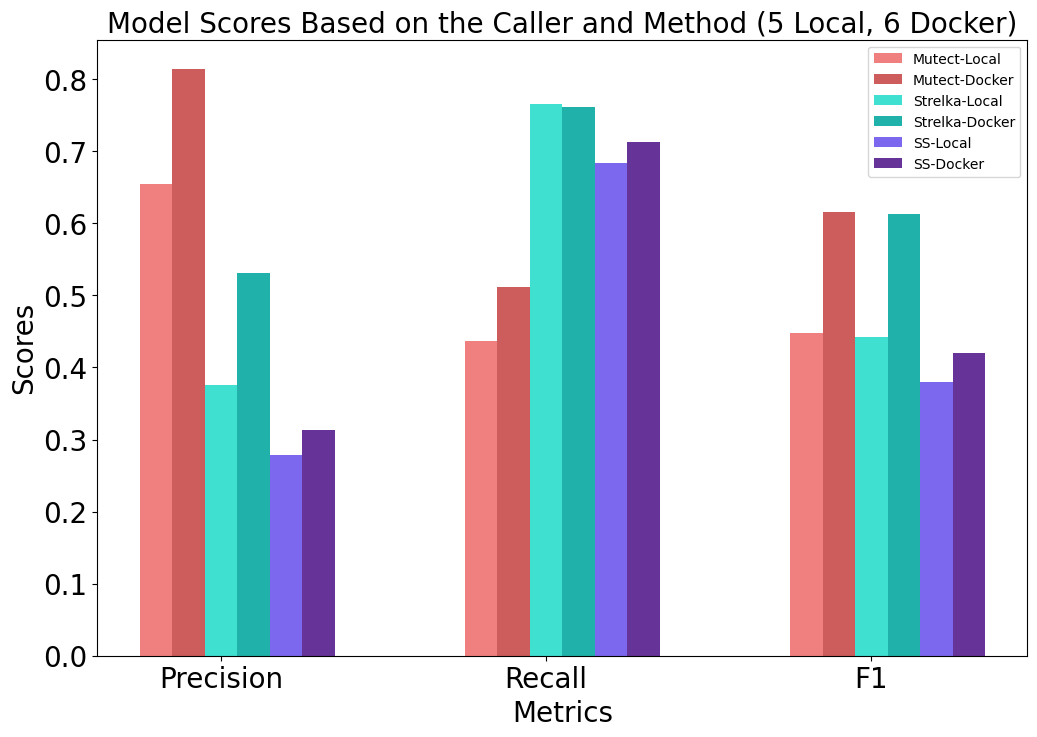

In [10]:
scores_cat1, scores_cat2 = FetchScoresBinaryFilteringAverage(merged_df, [0, 1], 'Method')
PlotBinaryCategoryScoresBarChart(scores_cat1=scores_cat1, 
                        scores_cat2=scores_cat2, 
                        labels=['Mutect-Local', 'Mutect-Docker', 'Strelka-Local', 'Strelka-Docker', 'SS-Local', 'SS-Docker'], 
                        title='Model Scores Based on the Caller and Method (5 Local, 6 Docker)', figname='scores_caller_bar_chart')

### 1.b. Method - Variant Caller - Scores (Box-Whiskers Plot)

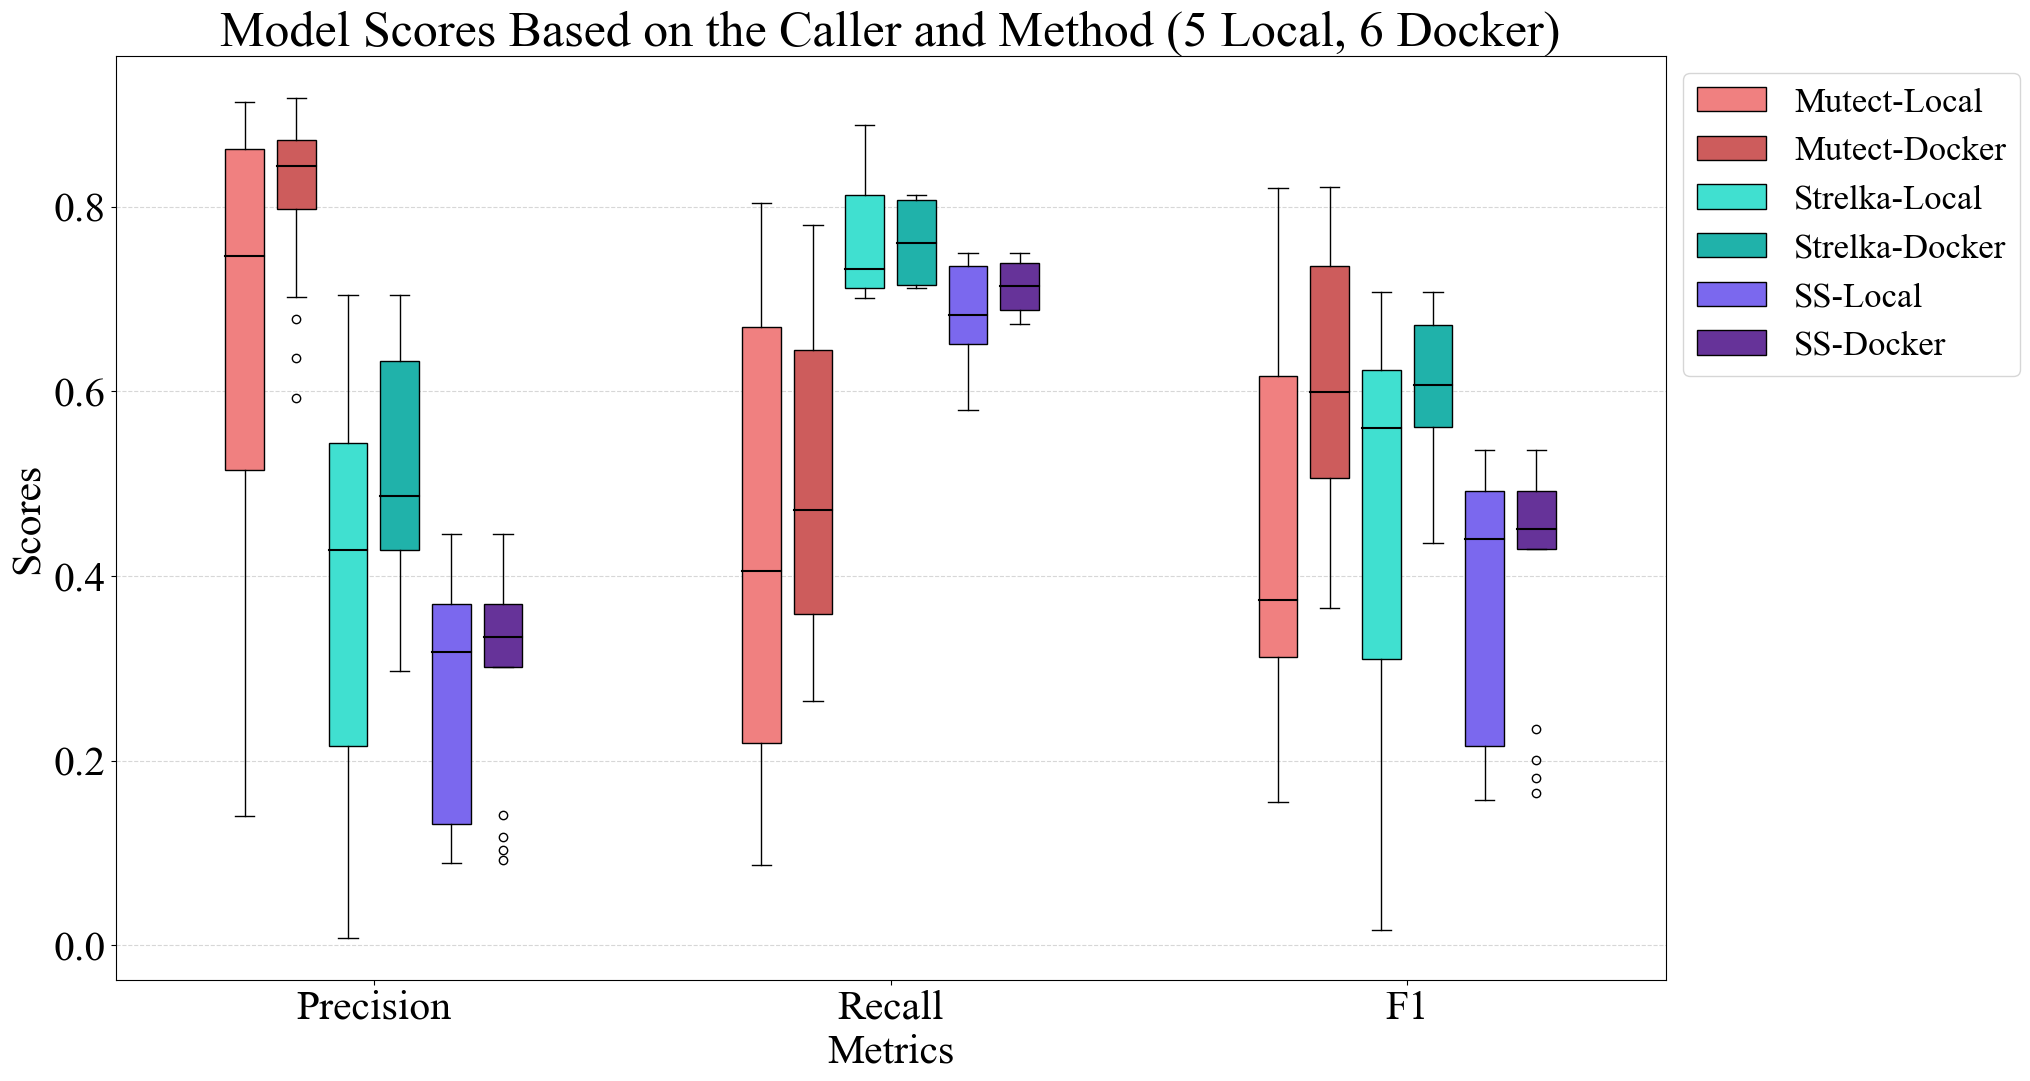

In [24]:
scores_cat1, scores_cat2 = FetchScoresVariantCallerBinaryFiltering(merged_df, [0, 1], 'Method')
plt.rcParams.update({'font.size': 30, 'font.family': 'Times New Roman'})
PlotBinaryCategoryVariantCallerScoresBoxPlot(scores_cat1=scores_cat1, 
                        scores_cat2=scores_cat2, 
                        labels_=['Mutect-Local', 'Mutect-Docker', 'Strelka-Local', 'Strelka-Docker', 'SS-Local', 'SS-Docker'], 
                        title='Model Scores Based on the Caller and Method (5 Local, 6 Docker)', figname='caller_method_scores_box-whiskers')

### 1.c. Method - Mapper - Scores (Box-Whiskers)

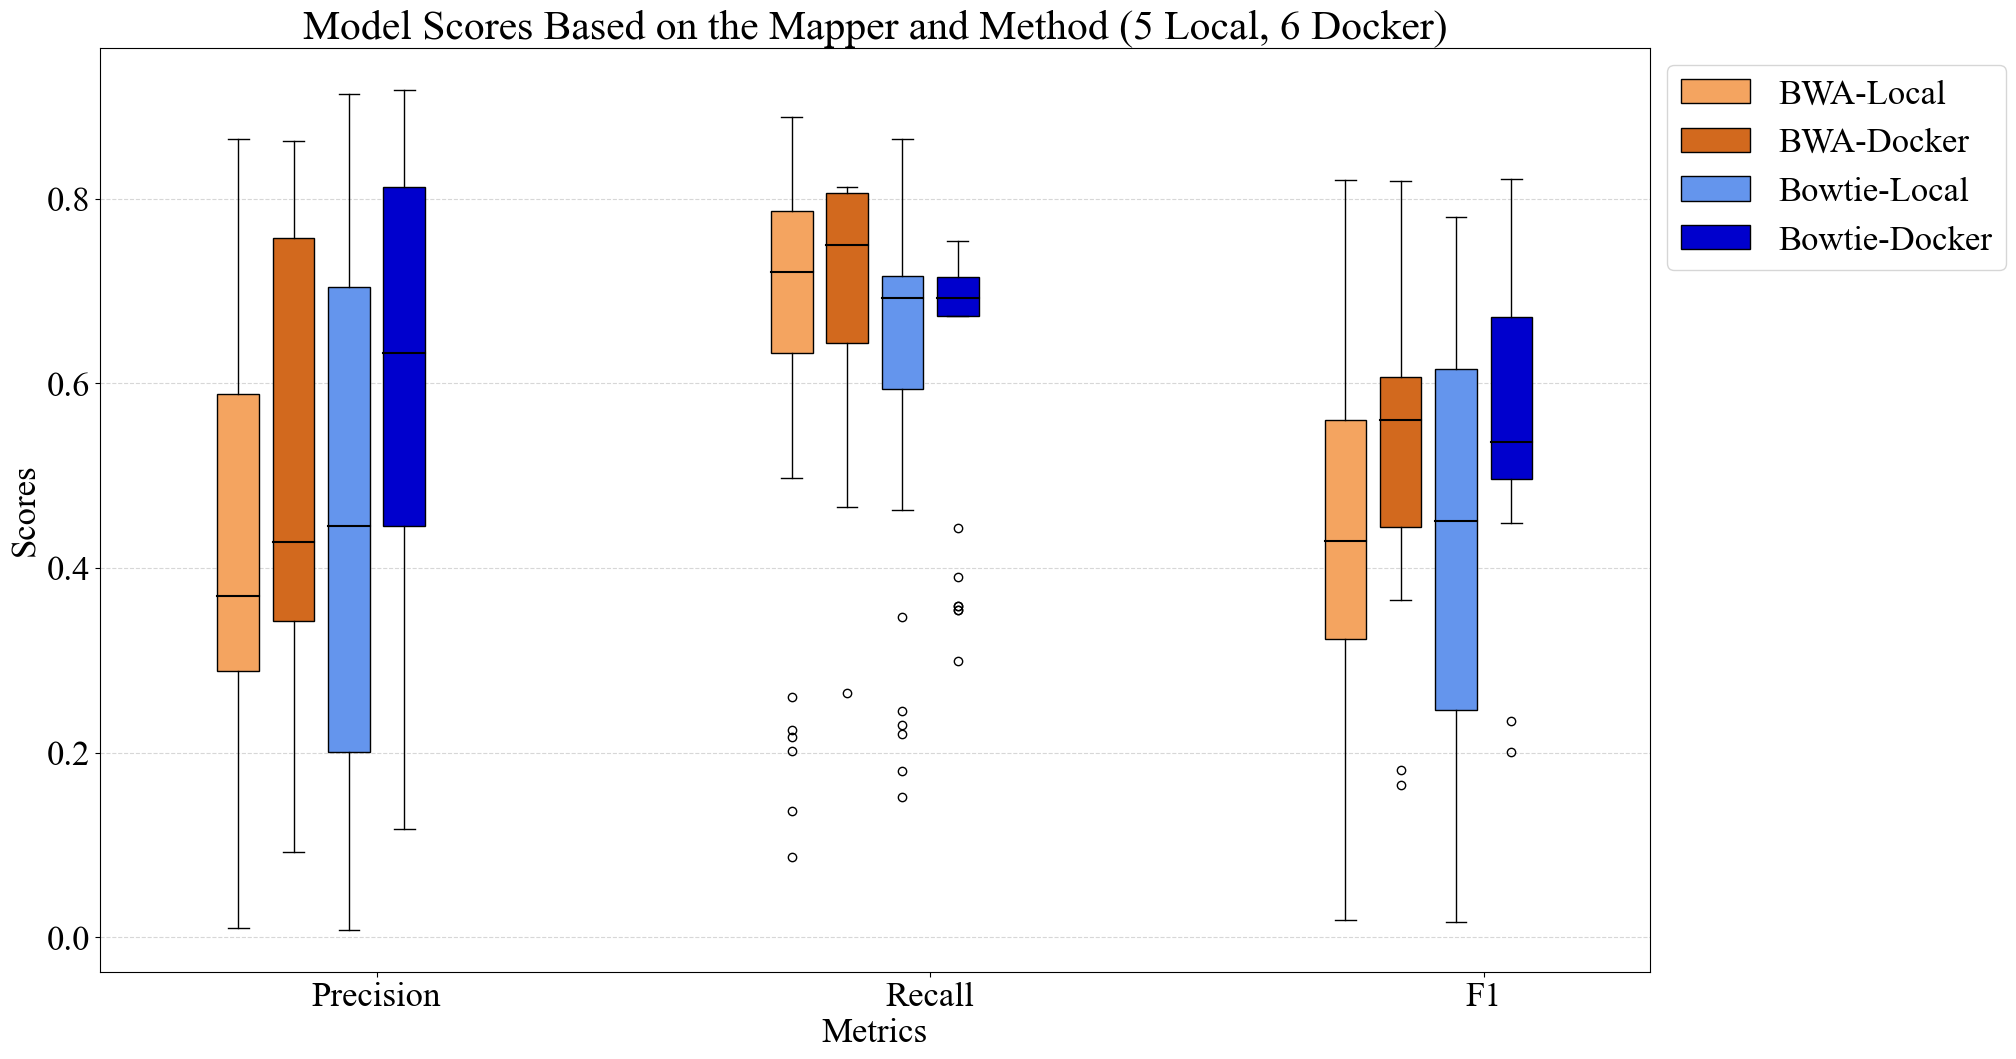

In [26]:
scores_cat1, scores_cat2 = FetchScoresMapperBinaryFiltering(merged_df, [0, 1], 'Method')
plt.rcParams.update({'font.size': 30, 'font.family': 'Times New Roman'})
PlotBinaryCategoryMapperScoresBoxPlot(scores_cat1=scores_cat1, 
                        scores_cat2=scores_cat2, 
                        labels_=['BWA-Local', 'BWA-Docker', 'Bowtie-Local', 'Bowtie-Docker'], 
                        title='Model Scores Based on the Mapper and Method (5 Local, 6 Docker)', figname='mapper_method_scores_box-whiskers')

-----

### 2.a. Operating System - Variant caller - Score

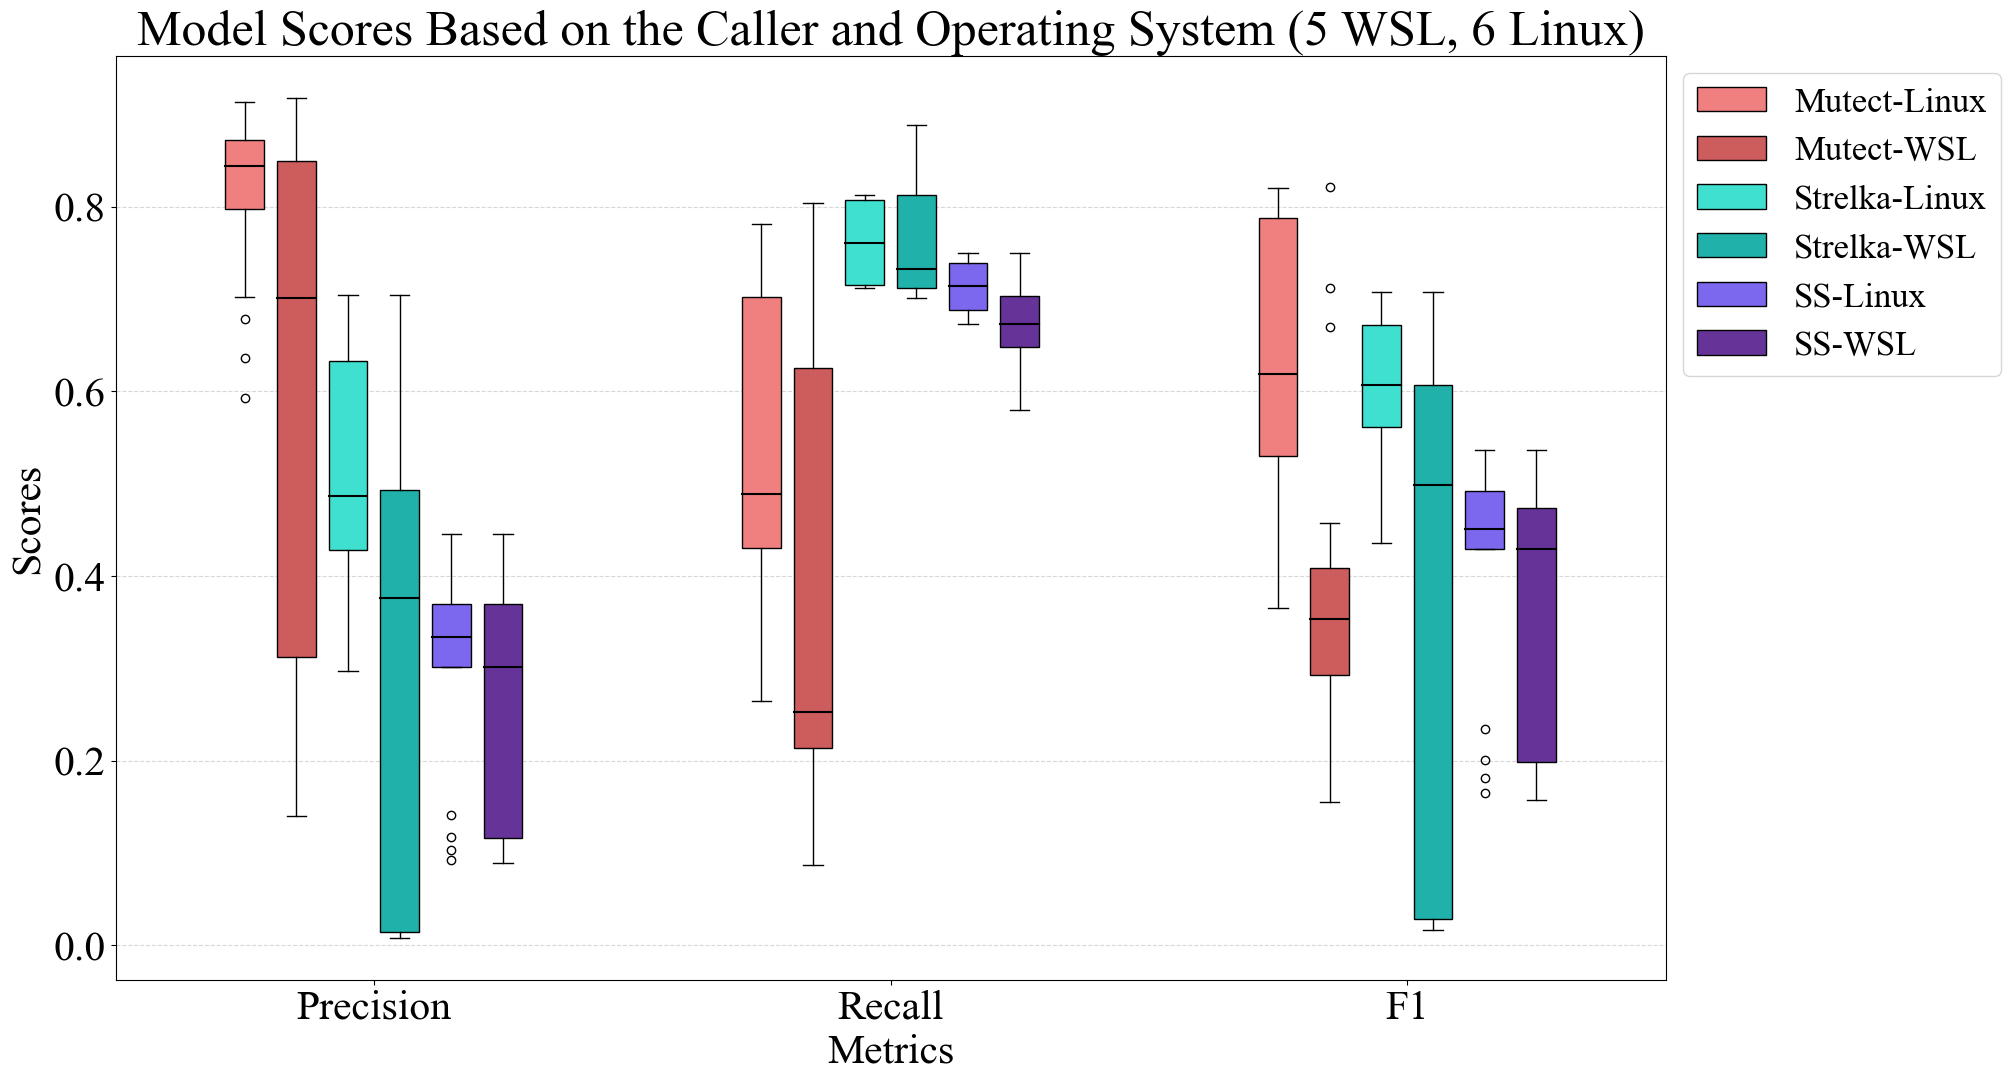

In [25]:
scores_cat1, scores_cat2 = FetchScoresVariantCallerBinaryFiltering(merged_df, [0, 1], 'OS')
PlotBinaryCategoryVariantCallerScoresBoxPlot(scores_cat1=scores_cat1, 
                        scores_cat2=scores_cat2, 
                        labels_=['Mutect-Linux', 'Mutect-WSL', 'Strelka-Linux', 'Strelka-WSL', 'SS-Linux', 'SS-WSL'], 
                        title='Model Scores Based on the Caller and Operating System (5 WSL, 6 Linux)', figname='os_scores_box-whiskers')

### 2.b. Operating System - Mapper - Score

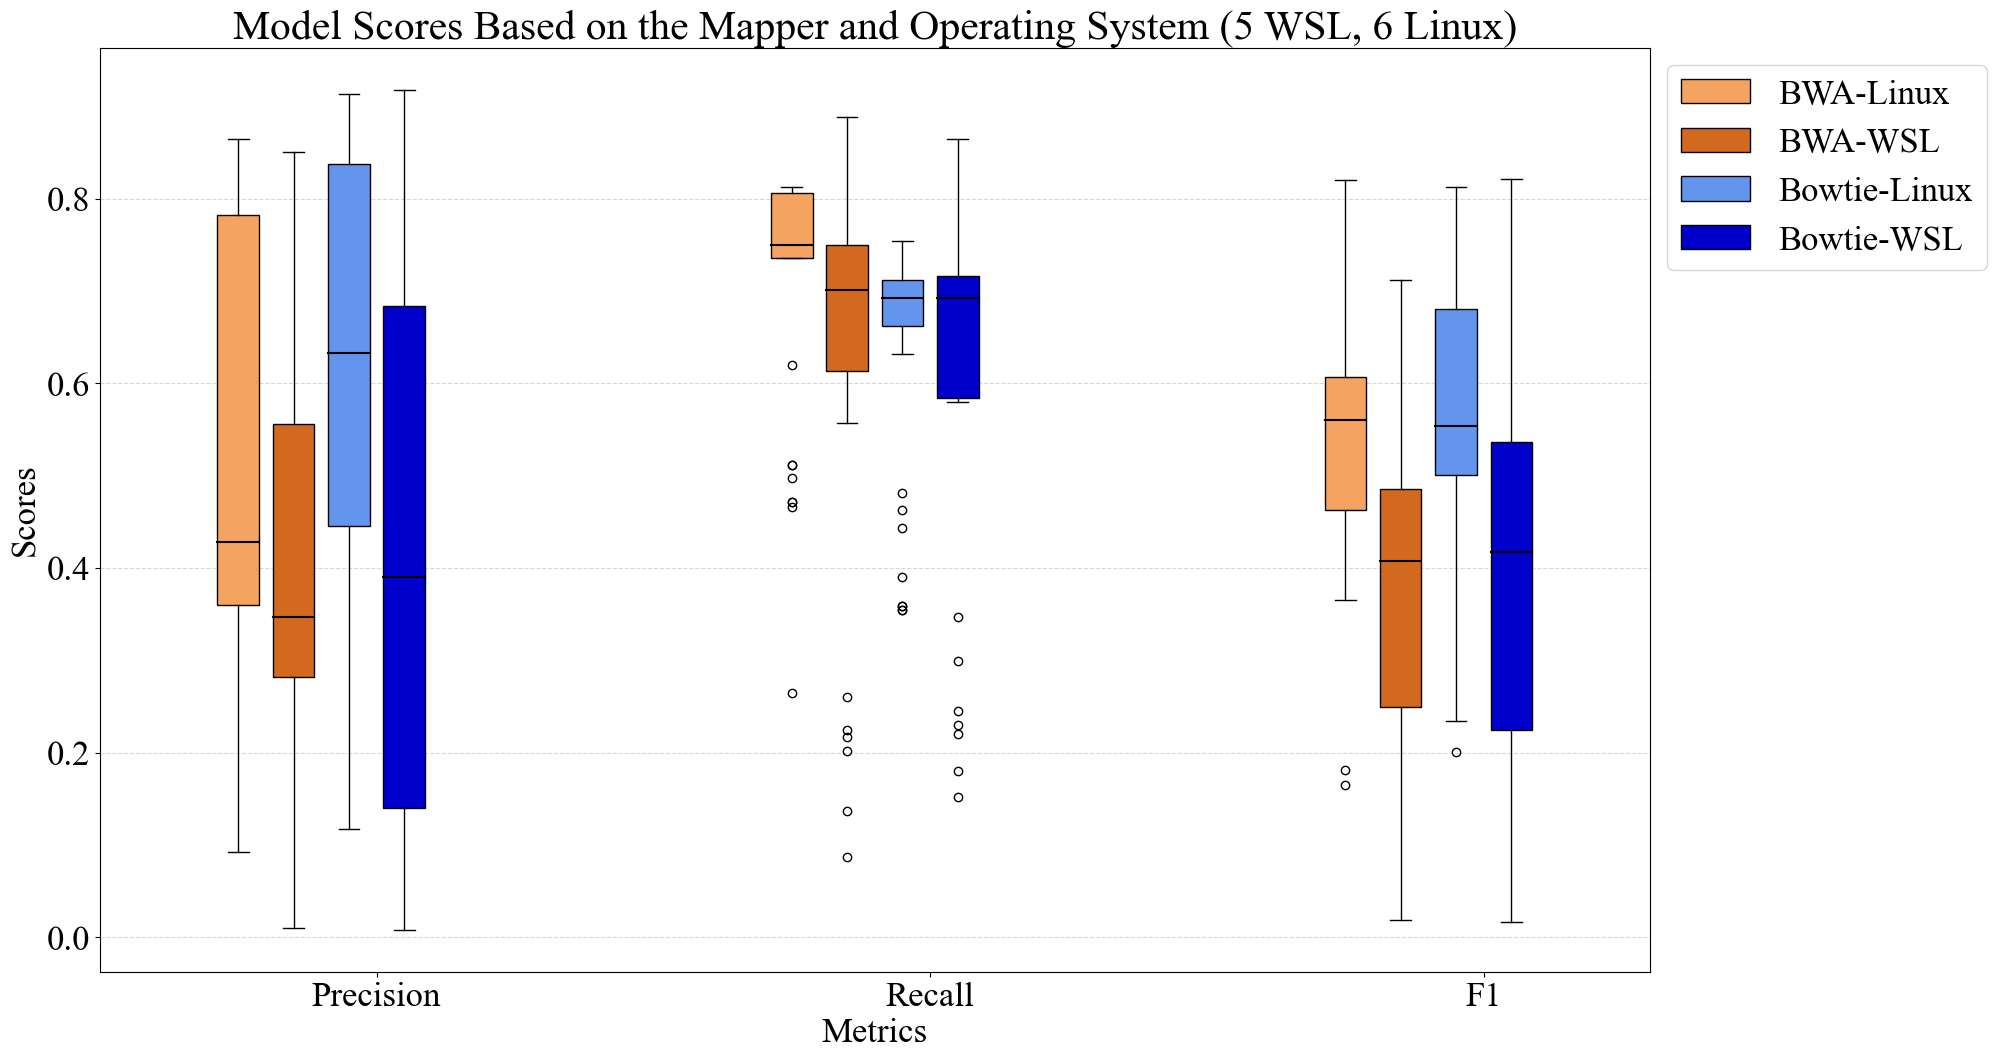

In [25]:
scores_cat1, scores_cat2 = FetchScoresMapperBinaryFiltering(merged_df, [0, 1], 'OS')
plt.rcParams.update({'font.size': 30, 'font.family': 'Times New Roman'})
PlotBinaryCategoryMapperScoresBoxPlot(scores_cat1=scores_cat1, 
                        scores_cat2=scores_cat2, 
                        labels_=['BWA-Linux', 'BWA-WSL', 'Bowtie-Linux', 'Bowtie-WSL'], 
                        title='Model Scores Based on the Mapper and Operating System (5 WSL, 6 Linux)', figname='mapper_os_scores_box-whiskers')

---

### 3.a. RAM - Variant Caller - Score

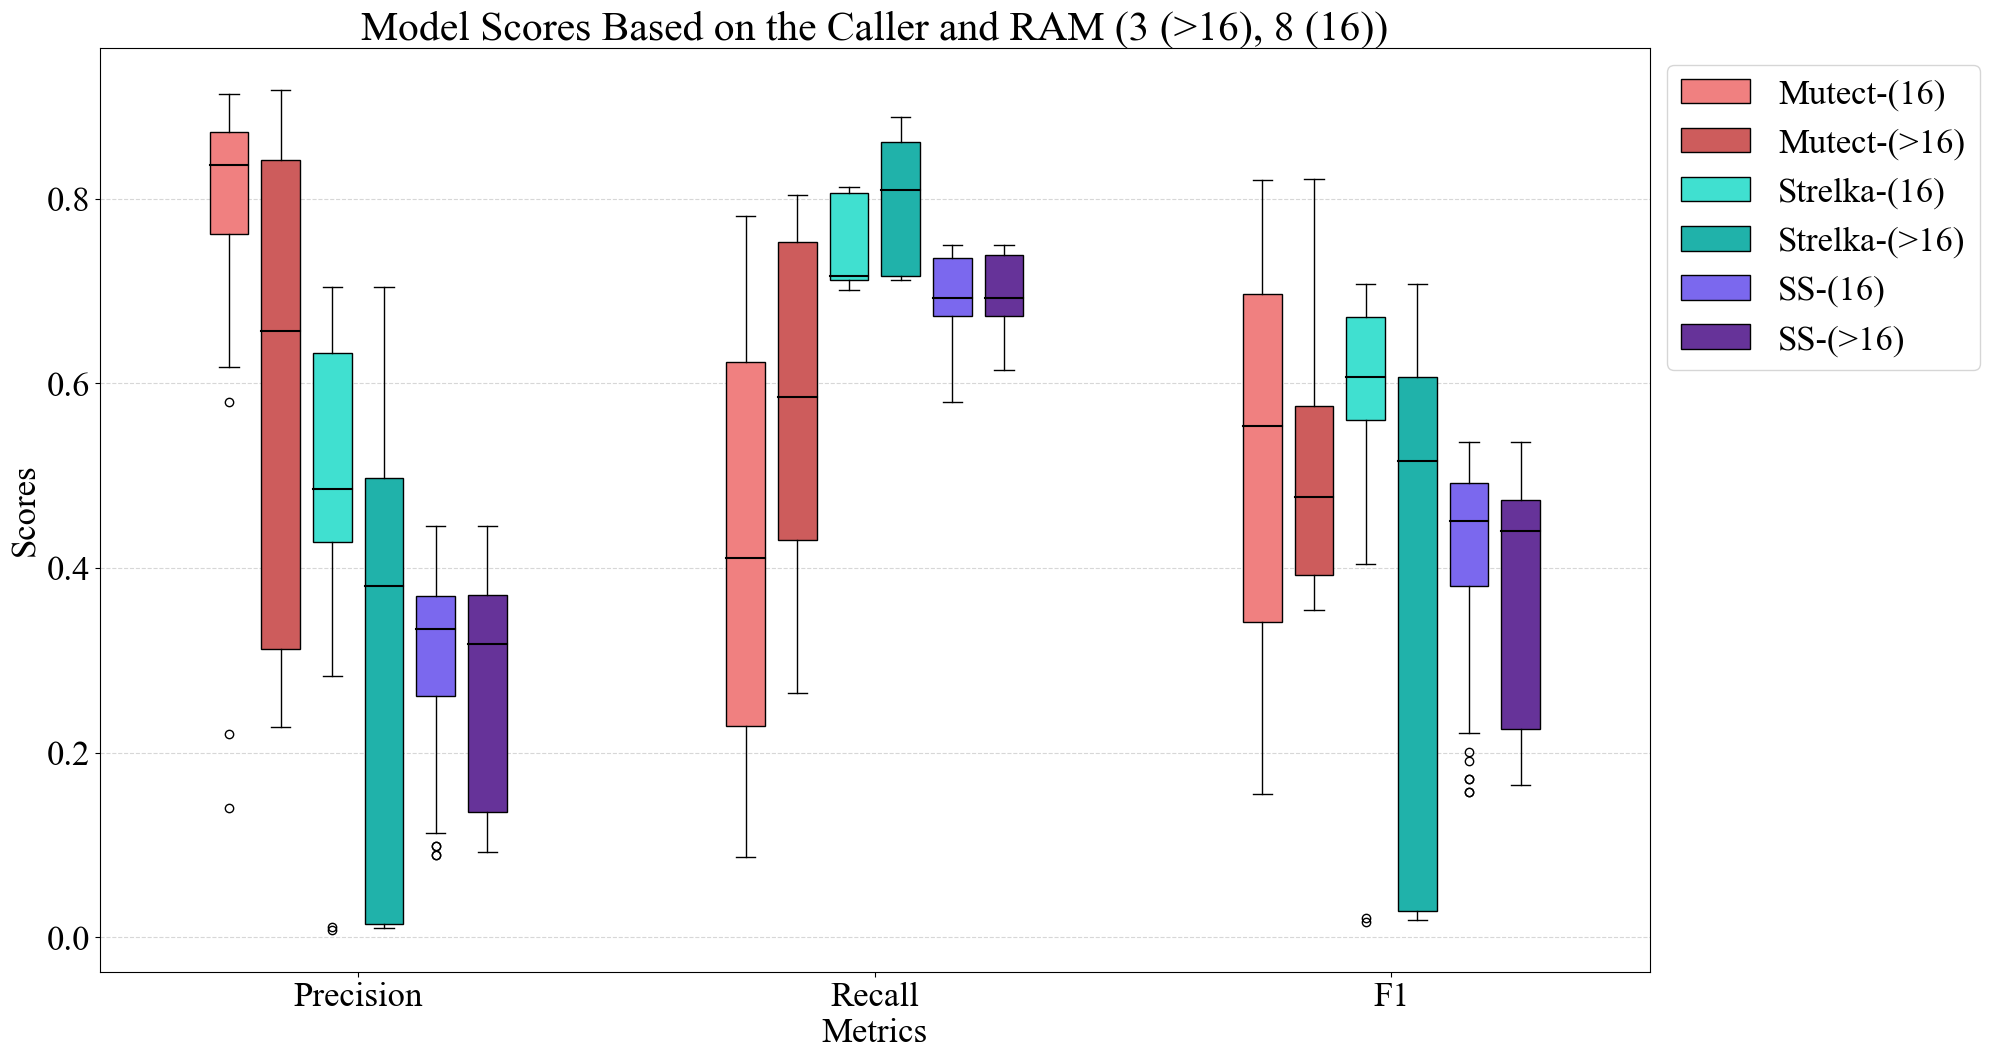

In [14]:
scores_cat1, scores_cat2 = FetchScoresVariantCallerBinaryFiltering(merged_df, [0, 1], 'RAM')
PlotBinaryCategoryVariantCallerScoresBoxPlot(scores_cat1=scores_cat1, 
                        scores_cat2=scores_cat2, 
                        labels_=['Mutect-(16)', 'Mutect-(>16)', 'Strelka-(16)', 'Strelka-(>16)', 'SS-(16)', 'SS-(>16)'], 
                        title='Model Scores Based on the Caller and RAM (3 (>16), 8 (16))', figname='caller_ram_scores_box-whiskers')

### 3.b. RAM - Mapper - Score

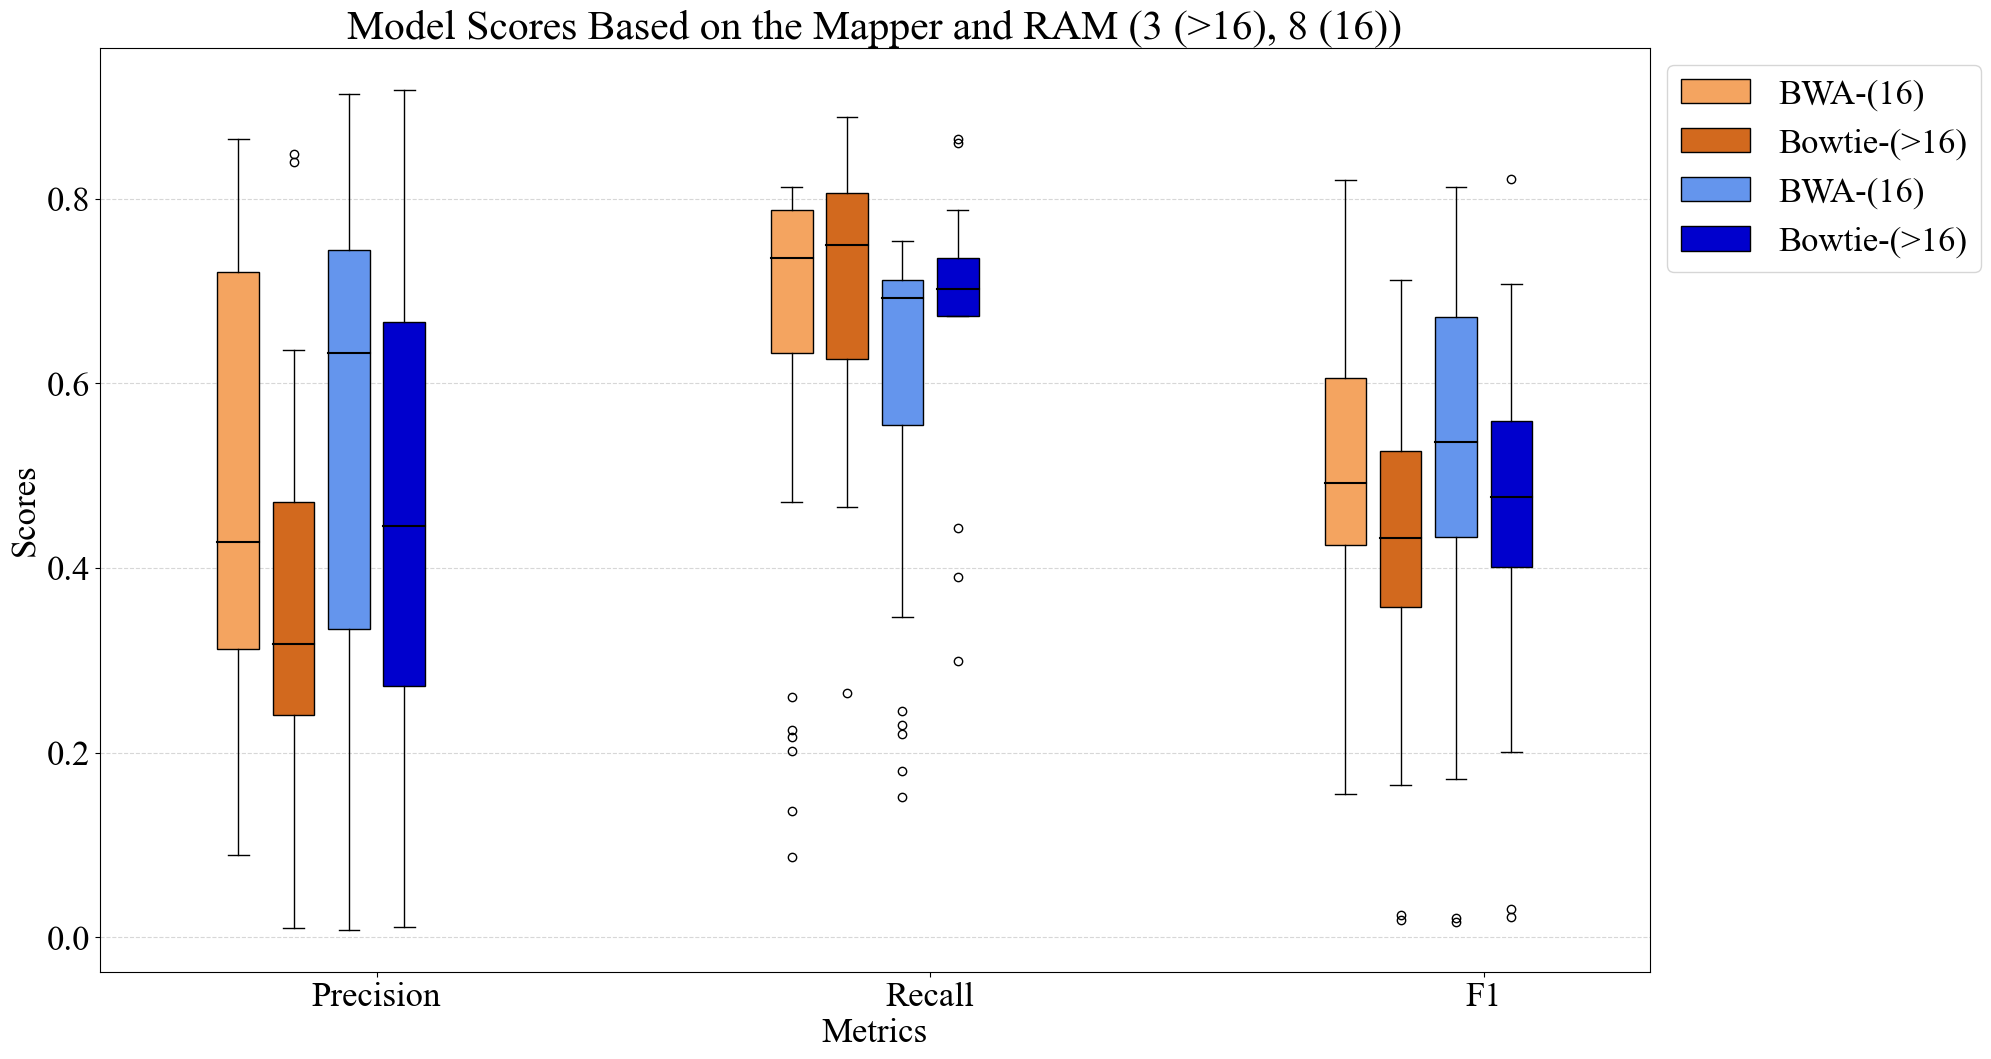

In [24]:
scores_cat1, scores_cat2 = FetchScoresMapperBinaryFiltering(merged_df, [0, 1], 'RAM')
PlotBinaryCategoryMapperScoresBoxPlot(scores_cat1=scores_cat1, 
                        scores_cat2=scores_cat2, 
                        labels_=['BWA-(16)', 'Bowtie-(>16)', 'BWA-(16)', 'Bowtie-(>16)'], 
                        title='Model Scores Based on the Mapper and RAM (3 (>16), 8 (16))', figname='mapper_ram_scores_box-whiskers')

----

### 4.a. Most Difficult Part - Scores

In [322]:
# Specify the columns that you do not want to melt
id_vars = [col for col in merged_df.columns if col not in ['precision', 'recall', 'f1']]

# Melting only the specified metric columns
melted_df = pd.melt(merged_df, id_vars=id_vars, value_vars=['precision', 'recall', 'f1'], var_name='metric', value_name='score')
melted_df.head()

,Group No,Method,OS,RAM,Hard disk,Additional hardware,Understand NGS,Helpful error logs,Enough cıurriculum,Time understanding definition,...,Time for analysis,Time for visualization,Time for report,Time for presentation,Most difficult part,Unnamed: 0,pipeline,accuracy,metric,score
0,g1,0,0,0,0,0,0,0,1,0,...,1,2,2,2,3,1,mutect_yb_bwa,0.694487,precision,0.862167
1,g1,0,0,0,0,0,0,0,1,0,...,1,2,2,2,3,17,mutect_yb_bowtie,0.451170,precision,0.877551
2,g1,0,0,0,0,0,0,0,1,0,...,1,2,2,2,3,25,mutect_nb_bwa,0.526701,precision,0.777538
3,g1,0,0,0,0,0,0,0,1,0,...,1,2,2,2,3,33,mutect_nb_bowtie,0.560398,precision,0.832955
4,g1,0,0,0,0,0,0,0,1,0,...,1,2,2,2,3,47,strelka_yb_bwa,0.434944,precision,0.485729


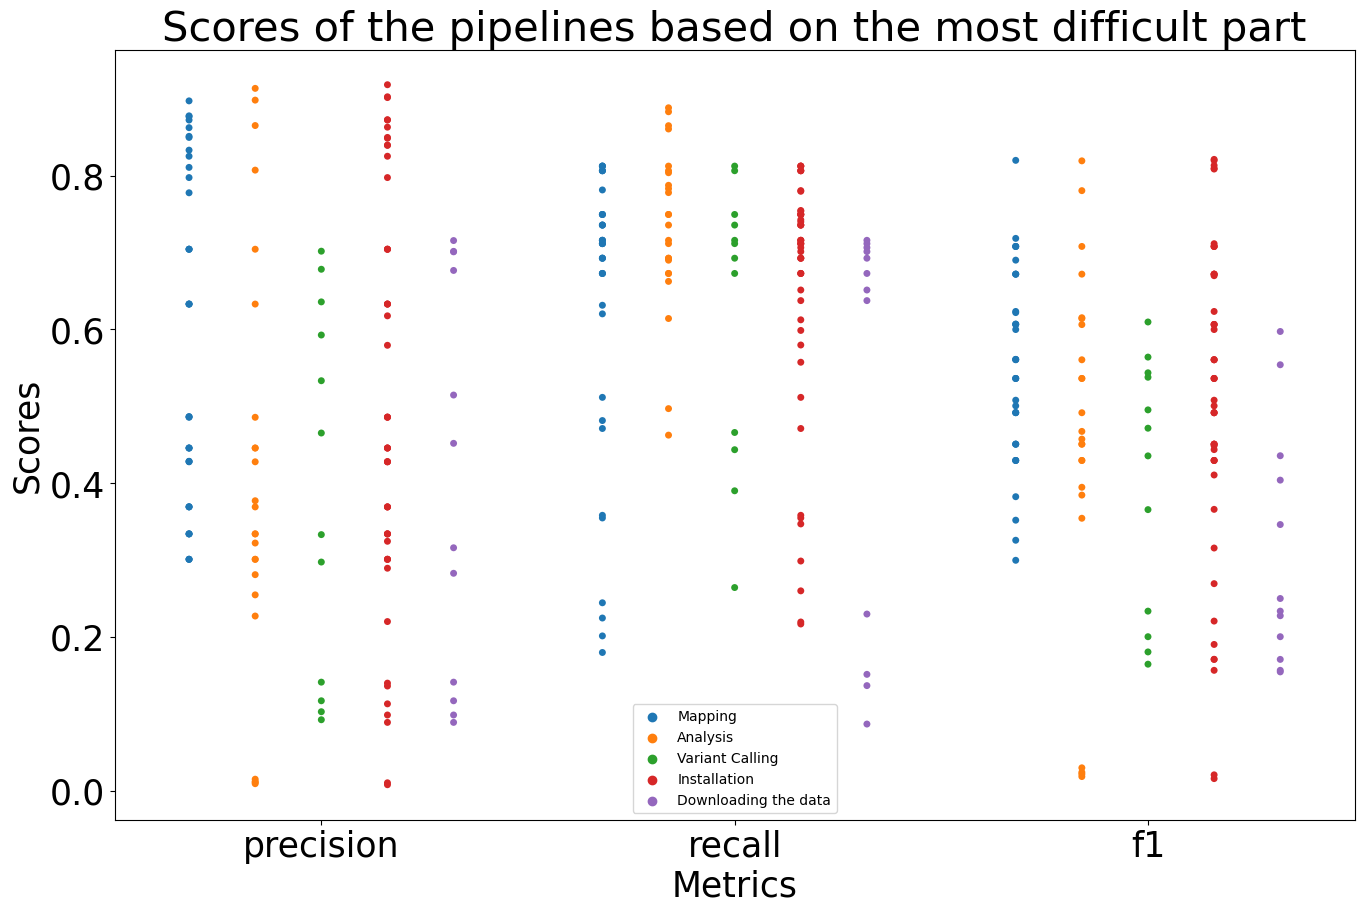

In [324]:
PlotScoresAsStripplot(melted_df.copy())